#1.PROBLEM STATEMENT

*   The hotel industry faces major challenges due to unpredictable last-minute cancellations and no-shows. These events cause significant revenue losses and disrupt room allocation and staffing efficiency.


*  Hotels often struggle to predict which reservations are likely to be canceled, making it difficult to optimize pricing and occupancy rates.


*   Solution:
Understanding customer demographics, and reservation patterns to identify high-risk bookings and support data-driven decision-making.
A machine learning–based cancellation prediction system that analyzes historical booking data.





#2.MOTIVATION


*   **Growing Demand:**
Hotels are increasingly seeking data-driven tools to manage unpredictable booking behaviors.
With rising online reservations and flexible cancellation policies, the need for accurate prediction systems is stronger than ever.
*   **Operational Efficiency:**
Predictive insights allow hotels to optimize room inventory, staffing schedules, and pricing strategies.
This reduces wasted resources and minimizes last-minute disruptions.

*   **Business Value:**
Accurate cancellation prediction helps hotels increase revenue, improve customer satisfaction, and enhance long-term loyalty.
By turning data into actionable insights, hotels can boost profitability and maintain a competitive edge in the hospitality market.


#3.OUR DATASET

**Source:**
From Kaggle – Hotel Booking Demand Dataset, originally published in the paper Hotel Booking Demand Datasets by Nuno Antonio, Ana Almeida, and Luis Nunes (Data in Brief, 2019).

**Size:**
Over 119,000 booking records collected between July 2015 and August 2017.

**Location:**
Both hotels are located in Portugal —
H1: a resort hotel in the Algarve region
H2: a city hotel in Lisbon

**Features:**
31 variables covering booking dates, length of stay, number of guests, room type, meal plan, previous cancellations, and more.

**Target:**
Binary variable indicating whether a booking was canceled (1) or not canceled (0).

#4.DATA CLEANING

In [1]:
!pip install catboost
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/ply00/815.git
%cd 815
!ls -R

Cloning into '815'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 1.21 MiB | 4.09 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/815
.:
hotel_bookings.csv  LICENSE  README.md


In [3]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df['deposit_type'].value_counts()

,count
deposit_type,
No Deposit,104641
Non Refund,14587
Refundable,162


In [7]:
df[df["deposit_type"] == "Non Refund"]["is_canceled"].value_counts()

,count
is_canceled,
1,14494
0,93


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# checking for null values
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [ ]:
# filling null values with zero
df.fillna(0, inplace = True)

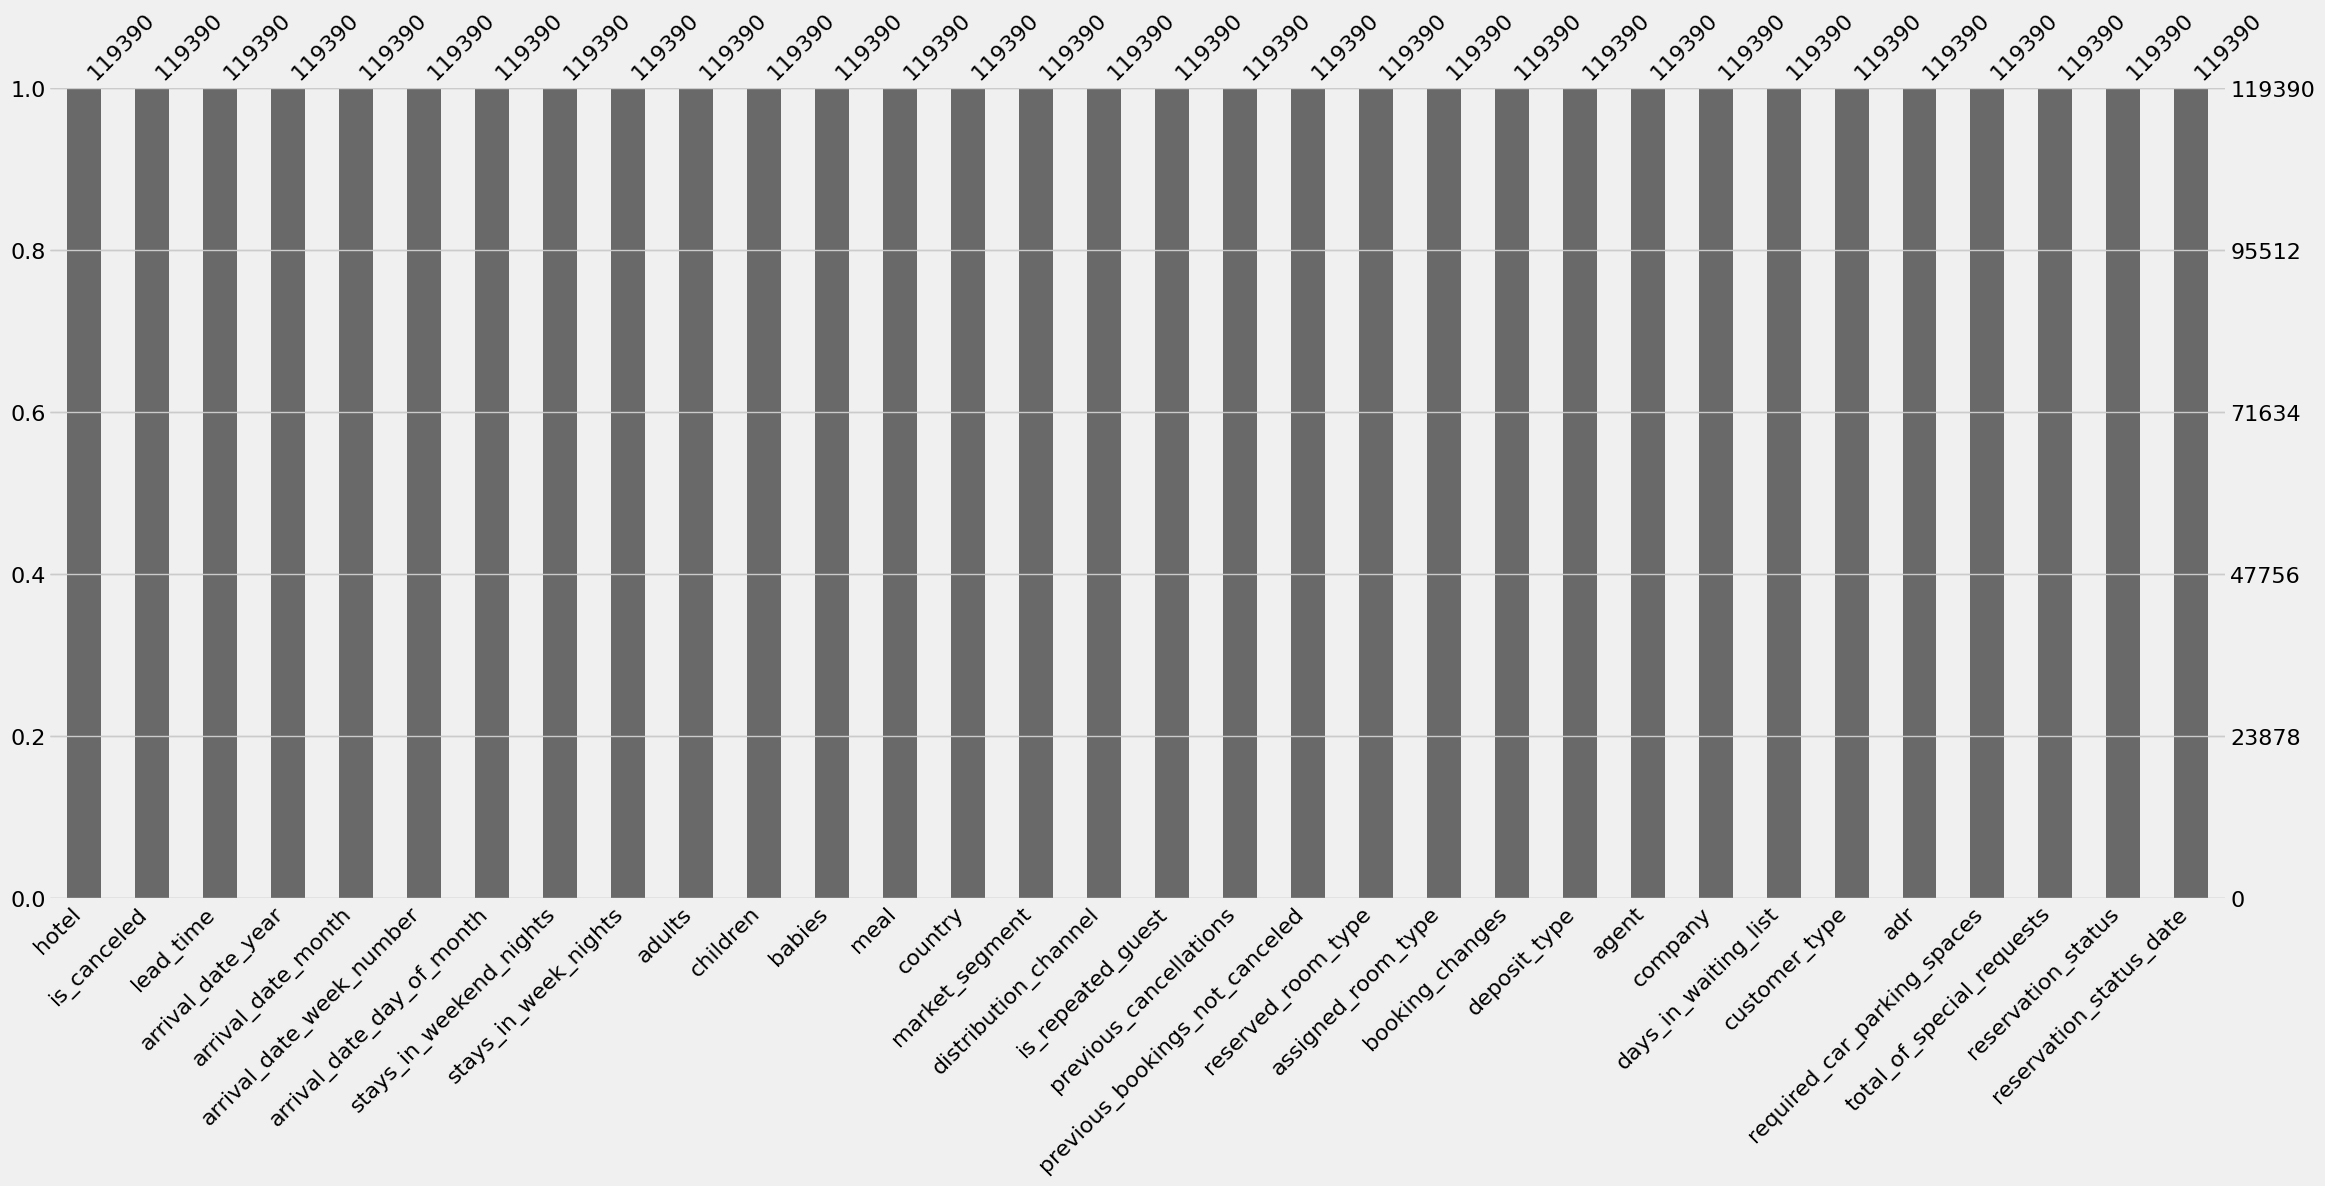

In [ ]:
# visualizing null values
msno.bar(df)
plt.show()

In [ ]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [ ]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df[]

#5.EDA QUESTIONS



**5.1.1 Where do most of the guests come from?**



In [ ]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,KIR,1
162,ATF,1
163,TJK,1
164,SLE,1


In [ ]:
fig = px.choropleth(
    country_wise_guests,
    locations='country',
    locationmode='ISO-3',
    color='No of guests',
    color_continuous_scale=[
        [0.00, '#d2e3f1'],
        [0.125, '#b8d0e7'],
        [0.25,  '#9ebedc'],
        [0.375, '#84abd1'],
        [0.5,   '#6999c7'],
        [0.625, '#4f86bc'],
        [0.75,  '#3574b1'],
        [0.875, '#1b61a7'],
        [1.0,   '#014f9c']
    ],
    title='Number of Guests by Country'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title='No of guests'),
    coloraxis=dict(
        cmin=0,
        cmax=1000
    )
)

fig.show()




The two hotels attract a diverse international clientele, with the majority of guests originating from Portugal and various other European countries.

**5.1.2 How much do guests pay for a room per night?**

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Both hotels have different room types and different meal arrangements. Seasonal factors are also important, So the prices varies a lot.

In [ ]:
data = df[df['is_canceled'] == 0]

fig = px.box(
    data_frame=data,
    x='reserved_room_type',
    y='adr',
    color='hotel',
    title='How Much Do Guests Pay Per Night by Room Type and Hotel',
    color_discrete_map={
        'Resort Hotel': '#2A7AB9',
        'City Hotel': '#CE4459'
    }
)

fig.update_layout(
    xaxis_title='Reserved Room Type',
    yaxis_title='Average Daily Rate (ADR)',
    font=dict(size=14),
    title_font=dict(size=18)
)

fig.show()


The figure shows that the average price per room depends on its type and the standard deviation.

**5.1.3 How does the price vary per night over the year?**

In [ ]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [ ]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [ ]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


We observe that the month column is not arranged chronologically, which could result in inaccurate or misleading insights when visualized.

First we have to provide right hierarchy to month column.

In [ ]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

In [ ]:
import sort_dataframeby_monthorweek as sd
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [ ]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [ ]:

fig = px.line(
    final_prices,
    x='month',
    y=['price_for_resort', 'price_for_city_hotel'],
    title='How Does the Price Vary Per Night Over the Year?',
    labels={'value': 'Average Daily Rate (ADR)', 'month': 'Month'},
    color_discrete_map={
        'price_for_resort': '#2A7AB9',
        'price_for_city_hotel': '#CE4459'
    }
)

fig.update_layout(
    title_font=dict(size=18),
    font=dict(size=14)
)

fig.show()


This plot clearly indicates that Resort Hotel prices peak in the summer, whereas City Hotel prices show less fluctuation and reach their highest levels in spring and autumn.

**5.1.4 Which are the most busy months?**

In [ ]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [ ]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [ ]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

,month,no of guests in resort,no of guest in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [ ]:
final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
final_guests['month'] = pd.Categorical(final_guests['month'], categories=month_order, ordered=True)
final_guests = final_guests.sort_values('month')

fig = px.line(
    final_guests,
    x='month',
    y=['no of guests in resort', 'no of guest in city hotel'],
    title='Which Are the Busiest Months?',
    labels={'value': 'Number of Guests', 'month': 'Month'},
    color_discrete_map={
        'no of guests in resort': '#2A7AB9',
        'no of guest in city hotel': '#CE4459'
    }
)

fig.update_layout(
    title_font=dict(size=18),
    font=dict(size=14)
)

fig.show()


* The City Hotel receives the highest number of guests in August. Similarly, the Resort Hotel also reaches a relative peak during the summer holiday period. Meanwhile, during June, there is a significant decrease as for Resort Hotel.


**5.1.5 How long do people stay at the hotels?**

In [ ]:
filter = df['is_canceled'] == 0
data = df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [ ]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [ ]:



filtered_stay = stay[stay['total_nights'] <= 15]

fig = px.bar(
    data_frame=filtered_stay,
    x='total_nights',
    y='Number of stays',
    color='hotel',
    barmode='group',
    title='How Long Do People Stay at the Hotels? (0–15 Nights)',
    labels={'total_nights': 'Total Nights', 'Number of stays': 'Number of Stays'},
    color_discrete_map={
        'City Hotel': '#2A7AB9',
        'Resort Hotel': '#CE4459'
    }
)

fig.update_layout(
    title_font=dict(size=18),
    font=dict(size=14),
    xaxis_tickangle=-45
)

fig.show()



This bar chart compares how long guests stay at City Hotels (blue) versus Resort Hotels (red), focusing on stays of 0–15 nights.City Hotels primarily serve short-term visitors, possibly business travelers or tourists on tight schedules.
Resort Hotels, by contrast, attract guests planning multi-day leisure stays.

**5.2.1 What is the overall cancellation rate?**

In [ ]:
cancel_counts = df['is_canceled'].value_counts().rename({0: 'Not Canceled', 1: 'Canceled'}).reset_index()
cancel_counts.columns = ['Cancellation Status', 'Count']

fig = px.bar(cancel_counts,
             x='Cancellation Status',
             y='Count',
             color='Cancellation Status',
             title='Overall Cancellation Status',
             color_discrete_sequence=['#c0d6ea', '#f7d4db'],
             text='Count')

fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


**5.2.2 How does the cancellation rate vary by customer type?**

In [ ]:

cancel_rate_by_customer = df.groupby('customer_type')['is_canceled'].mean().reset_index()
cancel_rate_by_customer['Cancellation Rate (%)'] = cancel_rate_by_customer['is_canceled'] * 100

cancel_rate_by_customer = cancel_rate_by_customer.sort_values(by='Cancellation Rate (%)', ascending=False)

fig = px.bar(cancel_rate_by_customer,
             x='Cancellation Rate (%)',
             y='customer_type',
             orientation='h',
             text='Cancellation Rate (%)',
             color='customer_type',
             color_discrete_sequence=['#0B559F', '#2A7AB9', '#539DCC', '#88BEDC', '#BAD6EA', '#D2E3F1'],
             title='Cancellation Rate by Customer Type')


fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')


fig.update_layout(
    xaxis_title='Cancellation Rate (%)',
    yaxis_title='Customer Type',
    yaxis=dict(categoryorder='total ascending'),
    showlegend=False
)

fig.show()



**5.2.3 Do cancellation patterns differ by lead time？**

In [ ]:

fig = px.box(
    df,
    x='is_canceled',
    y='lead_time',
    color='is_canceled',
    title='Do Cancellation Patterns Differ by Lead Time?',
    labels={'is_canceled': 'Canceled (1=Yes, 0=No)', 'lead_time': 'Lead Time (Days)'},
    color_discrete_map={0: '#2A7AB9', 1: '#CE4459'}
)

fig.update_layout(
    title_font=dict(size=18),
    font=dict(size=14),
    xaxis=dict(tickmode='array', tickvals=[0,1], ticktext=['Not Canceled', 'Canceled'])
)

fig.show()


This box plot compares the lead time between bookings that were canceled (red) and those that were not canceled (blue). The median lead time for canceled bookings is significantly higher than that for non-canceled ones. This indicates that guests who book far in advance are more likely to cancel — possibly due to changes in plans or better offers found later. Hotels should closely monitor and manage long-lead bookings, as they present a higher cancellation risk. Offering non-refundable options or partial deposit requirements for long-lead reservations. Sending reminder emails or promotional incentives closer to check-in dates to reduce cancellations.



**5.2.4 Does deposit type impact cancellation likelihood?**

In [ ]:

deposit_cancel_rate = df.groupby('deposit_type')['is_canceled'].mean().reset_index()
deposit_cancel_rate.columns = ['deposit_type', 'cancellation_rate']


deposit_cancel_rate = deposit_cancel_rate.sort_values(by='cancellation_rate', ascending=False)


color_map = {
    'Non Refund': '#2A7AB9',
    'No Deposit': '#CE4459',
    'Refundable': '#7FB77E'
}


fig = px.bar(
    deposit_cancel_rate,
    x='deposit_type',
    y='cancellation_rate',
    color='deposit_type',
    text=deposit_cancel_rate['cancellation_rate'].apply(lambda x: f'{x:.2%}'),
    title='Cancellation Rate by Deposit Type',
    labels={'cancellation_rate': 'Cancellation Rate'},
    color_discrete_map=color_map
)


fig.update_layout(
    title_font=dict(size=18),
    font=dict(size=14),
    showlegend=False
)

fig.show()



**5.2.5 Are cancellations more common during certain months or seasons?**

# 6.DATA  PROCESSING

Correlation coefficient plot

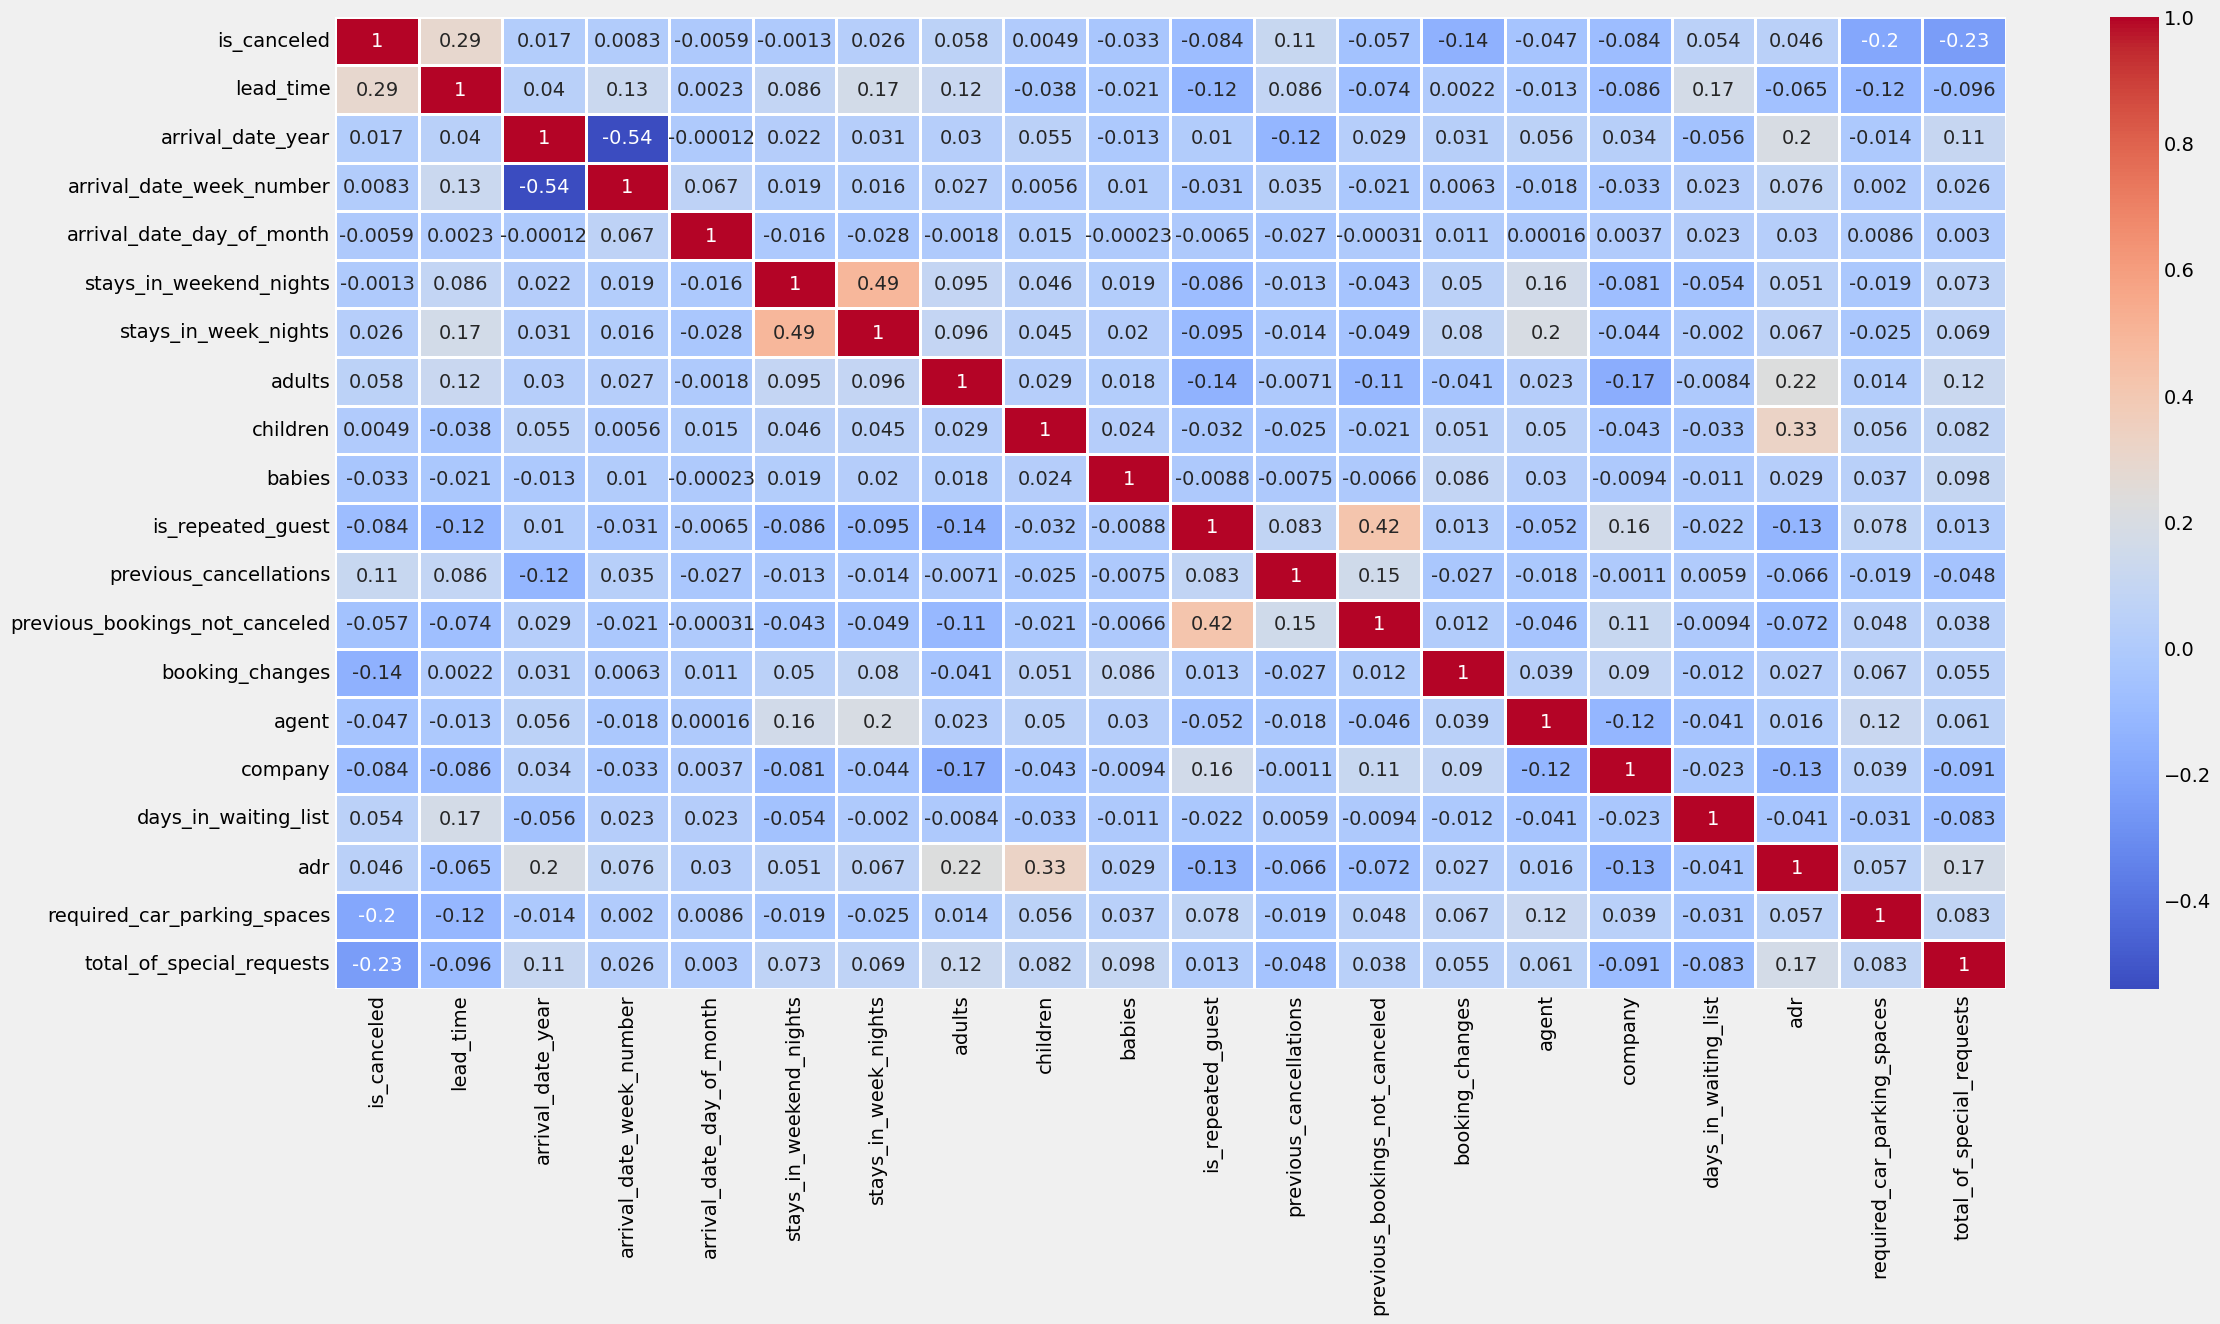

In [ ]:
plt.figure(figsize=(24, 12))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, linewidths=1, cmap='coolwarm')
plt.show()


In [ ]:
num_df = df.select_dtypes(include=['number'])
correlation = num_df.corr()['is_canceled'].abs().sort_values(ascending=False)
correlation

,is_canceled
is_canceled,1.000000
lead_time,0.292876
total_of_special_requests,0.234877
required_car_parking_spaces,0.195701
booking_changes,0.144832
previous_cancellations,0.110139
is_repeated_guest,0.083745
company,0.083594
adults,0.058182
previous_bookings_not_canceled,0.057365


In [ ]:
# dropping columns that are not useful
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes', 'reservation_status', 'country', 'days_in_waiting_list']
df.drop(useless_col, axis = 1, inplace = True)

In [ ]:
# creating numerical and categorical dataframes
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [ ]:
cat_df = df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [ ]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [ ]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [ ]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [ ]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [ ]:
# encoding categorical variables
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})
cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,'GDS': 4})
cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6, 'L': 7, 'B': 8})
cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})
cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})
cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [ ]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [ ]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0


In [ ]:
num_df.var()

,0
lead_time,11422.361808
arrival_date_week_number,184.990111
arrival_date_day_of_month,77.107192
stays_in_weekend_nights,0.990258
stays_in_week_nights,3.599010
adults,0.330838
children,0.159070
babies,0.009508
is_repeated_guest,0.030507
previous_cancellations,0.713887


In [ ]:
# normalizing numerical variables
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [ ]:
num_df.var()

,0
lead_time,2.582757
arrival_date_week_number,0.440884
arrival_date_day_of_month,0.506325
stays_in_weekend_nights,0.990258
stays_in_week_nights,3.599010
adults,0.330838
children,0.159070
babies,0.009508
is_repeated_guest,0.030507
previous_cancellations,0.713887


In [ ]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [ ]:
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,5.837730,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
1,6.603944,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0.000000,0.0,4.330733,0,0
3,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.720312,0.0,4.330733,0,0
4,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.484797,0.0,4.595120,0,1


In [ ]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [ ]:
X.shape, y.shape

((119210, 26), (119210,))

In [ ]:
# splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
64538,1,0,2,2,1,0,0,2,12,4,4.595120,2.484907,2.564949,2,1,2,0.0,0,0,0,0,2.302585,0.000000,4.587006,0,0
34213,0,0,2,2,2,0,0,3,3,20,3.295837,2.484907,2.833213,1,3,1,0.0,0,0,0,0,5.484797,0.000000,4.234107,0,1
89794,1,0,1,1,1,0,2,2,5,26,1.791759,3.135494,3.218876,0,2,1,0.0,0,0,0,0,0.000000,4.369448,4.615121,0,0
42929,1,0,1,1,1,0,2,0,9,8,4.477337,3.637586,2.484907,0,1,2,0.0,0,0,0,0,0.000000,4.234107,4.615121,0,0
67011,1,0,3,2,1,3,0,3,1,6,4.718499,2.890372,3.332205,1,3,2,0.0,0,0,0,0,3.465736,0.000000,4.795791,0,0


In [ ]:
X_test.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
34449,0,2,5,2,1,0,2,3,3,26,4.442651,2.302585,0.693147,6,19,2,0.0,0,0,0,0,6.089045,0.0,4.039536,0,1
104190,1,3,2,2,1,0,0,3,1,8,2.639057,0.693147,1.386294,0,5,2,0.0,0,0,0,0,2.079442,0.0,4.070735,0,1
79193,1,0,2,2,5,0,1,0,10,23,4.290459,3.970292,3.091042,1,4,2,2.0,0,0,1,0,2.302585,0.0,5.077047,0,1
7661,0,0,2,2,1,0,0,2,7,5,3.891820,3.555348,2.995732,0,2,2,0.0,0,0,0,0,5.484797,0.0,5.298317,0,1
68334,1,0,5,2,1,3,0,3,1,31,5.105945,3.044522,2.772589,1,2,1,0.0,0,0,0,0,0.000000,0.0,5.081404,0,0


In [ ]:
y_train.head(), y_test.head()

(64538    1
 34213    0
 89794    0
 42929    1
 67011    1
 Name: is_canceled, dtype: int64,
 34449     0
 104190    0
 79193     1
 7661      1
 68334     1
 Name: is_canceled, dtype: int64)

In [ ]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

monthly_cancel_df = (
    df[['arrival_date_month', 'is_canceled']]
      .groupby('arrival_date_month')['is_canceled']
      .mean()
)

monthly_cancel_df = (
    monthly_cancel_df
      .reindex(month_order)
      .reset_index()
)

monthly_cancel_df.columns = ['Month', 'Cancellation Rate']

fig_cancel_rate = px.line(
    monthly_cancel_df,
    x='Month',
    y='Cancellation Rate',
    markers=True,
    title='Cancellation Rate by Month',
    labels={'Cancellation Rate': 'Cancellation Rate'},
)

fig_cancel_rate.update_layout(
    title_font=dict(size=18),
    font=dict(size=14),
    yaxis_tickformat='.0%'
)

fig_cancel_rate.show()


The line chart illustrates how hotel cancellation rates fluctuate across the 12 months of the year. The cancellation rate represents the percentage of total bookings that were canceled in each month. Overall, the chart shows a dynamic pattern, with values ranging approximately from 31% to 42%, revealing strong seasonal trends in booking behavior.

 # 7.MODELING

**7.1 Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Logistic Regression
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)

y_pred_log = log_clf.predict(X_test)
y_proba_log = log_clf.predict_proba(X_test)[:, 1]

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression Results
Accuracy: 0.811704834605598
ROC-AUC: 0.8455117288684442
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86     22635
           1       0.86      0.58      0.69     13128

    accuracy                           0.81     35763
   macro avg       0.83      0.76      0.78     35763
weighted avg       0.82      0.81      0.80     35763

Confusion Matrix:
 [[21390  1245]
 [ 5489  7639]]


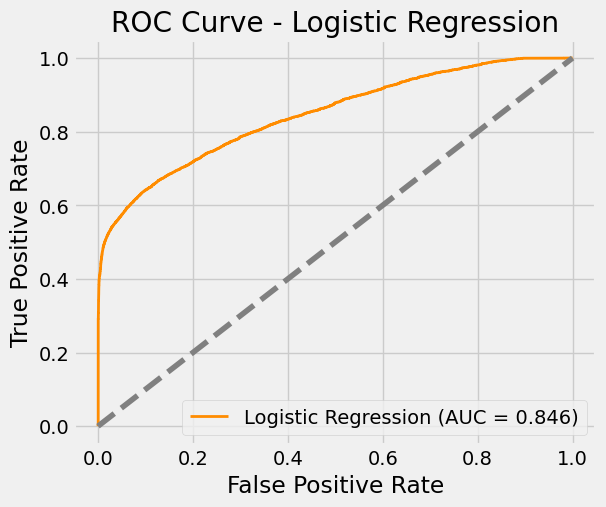

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**7.2 Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)
y_proba_gb = gb_clf.predict_proba(X_test)[:, 1]

print("Gradient Boosting Results")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Results
Accuracy: 0.9148002125101362
ROC-AUC: 0.9613376902240158
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     22635
           1       0.98      0.78      0.87     13128

    accuracy                           0.91     35763
   macro avg       0.94      0.89      0.90     35763
weighted avg       0.92      0.91      0.91     35763

Confusion Matrix:
 [[22476   159]
 [ 2888 10240]]


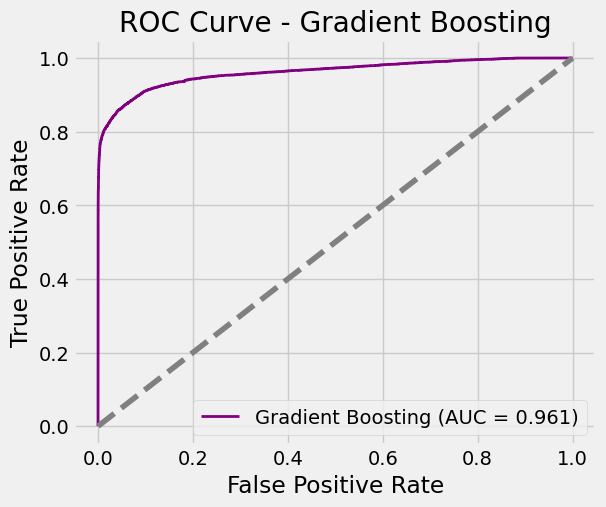

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr_gb, tpr_gb, color='purple', lw=2,
         label=f'Gradient Boosting (AUC = {roc_auc_gb:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**7.3 Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results
Accuracy: 0.9535273886418925
ROC-AUC: 0.9879768211773439
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     22635
           1       0.99      0.89      0.93     13128

    accuracy                           0.95     35763
   macro avg       0.96      0.94      0.95     35763
weighted avg       0.96      0.95      0.95     35763

Confusion Matrix:
 [[22479   156]
 [ 1506 11622]]


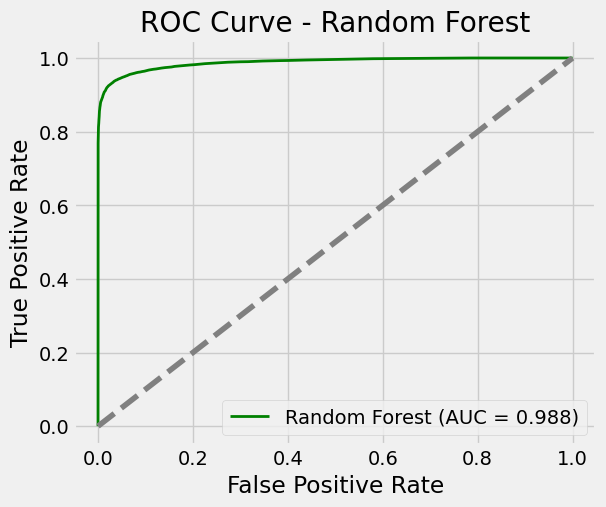

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2,
         label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**Overview for 3 Modeling types**

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score

results = pd.DataFrame({
    "Model": ["Logistic Regression","Gradient Boosting","Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_rf)

    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_proba_log),
        roc_auc_score(y_test, y_proba_gb),
        roc_auc_score(y_test, y_proba_rf)
    ]
})

print("Model Performance Summary")
print(results)


Model Performance Summary
                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.811705  0.845512
1    Gradient Boosting  0.914800  0.961338
2        Random Forest  0.953527  0.987977


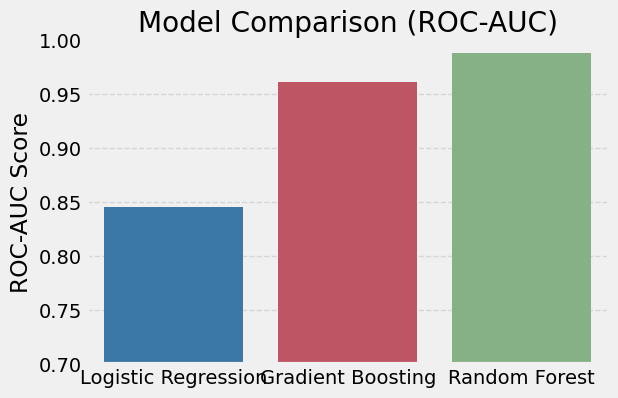

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_colors = ['#2A7AB9', '#CE4459', '#7FB77E']

plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="ROC-AUC", data=results, palette=custom_colors)
plt.title("Model Comparison (ROC-AUC)")
plt.ylim(0.7, 1.0)
plt.xlabel("")
plt.ylabel("ROC-AUC Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Random Forest performs the best, achieving the highest ROC-AUC score (close to 1.0), indicating strong classification ability and excellent discrimination between classes. Gradient Boosting also performs well, only slightly below Random Forest, showing that ensemble methods effectively capture complex, nonlinear relationships in the data. Logistic Regression has the lowest ROC-AUC score (~0.85), suggesting it struggles with nonlinear patterns that the other two tree-based models can learn.

For business applications like hotel booking cancellation prediction or credit default detection, Random Forest would likely provide the most reliable results. However, if model transparency or explainability is essential, Logistic Regression may still be useful for interpreting feature importance and decision boundaries.

# 8.ANALYSIS FOR FEATURE IMPORTANCE

**8.1 Use Random Forest to identify the feature importance**

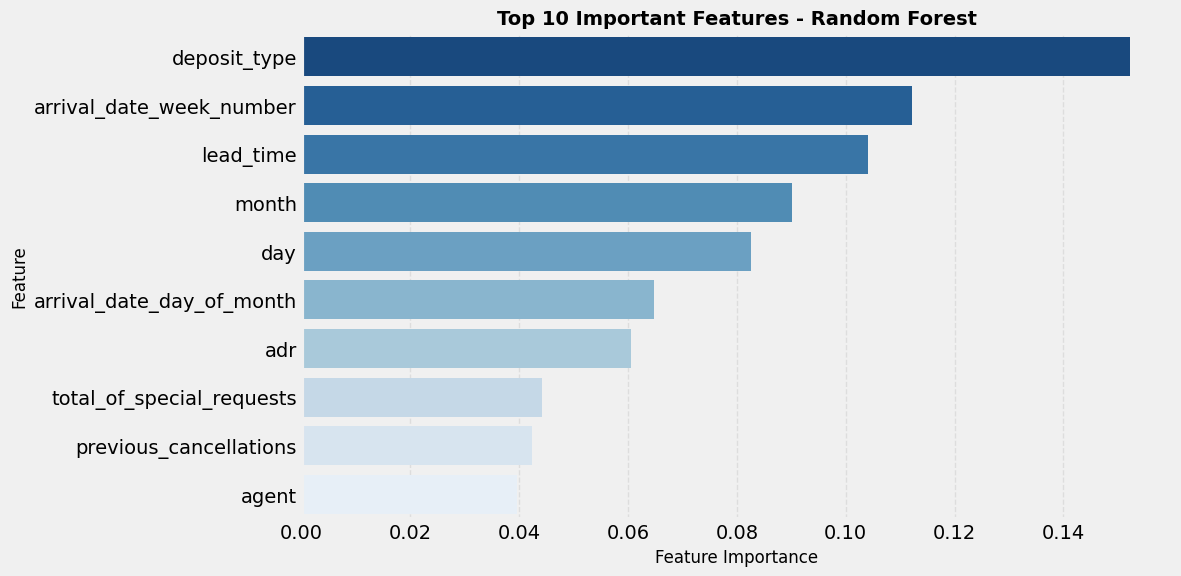

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


importances_rf = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
top10_rf = importances_rf.sort_values(ascending=False).head(10)


plt.figure(figsize=(10,6))
sns.barplot(
    x=top10_rf.values,
    y=top10_rf.index,
    palette=sns.color_palette("Blues_r", n_colors=10)
)
plt.title("Top 10 Important Features - Random Forest", fontsize=14, weight='bold')
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


**Analysis:**

The Random Forest model highlights deposit_type, arrival_date_week_number, and lead_time as the top three factors influencing hotel booking cancellations.

Deposit type is the most critical driver: non-refundable deposits are associated with a significantly higher likelihood of cancellation, suggesting that customers booking under these terms may be more uncertain about their plans.

Arrival date week number and lead time indicate that bookings made far in advance or during specific weeks (possibly peak seasons) tend to have higher cancellation rates.

On the other hand, special requests, repeat guests, and higher ADR (average daily rate) are linked to lower cancellation probability — customers who are more invested in their bookings are less likely to cancel.

Overall, the model provides actionable insights: hotels can identify high-risk reservations early, send reminders, or implement dynamic pricing and deposit policies to reduce cancellations.

**8.2.1 deposit_type vs Cancellation**

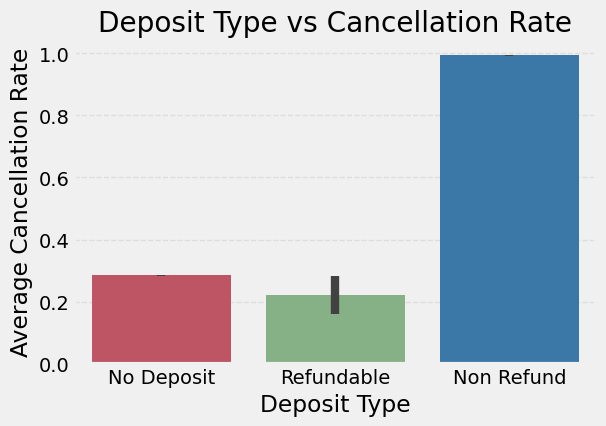

In [ ]:

color_map = {
    'Non Refund': '#2A7AB9',
    'No Deposit': '#CE4459',
    'Refundable': '#7FB77E'
}

plt.figure(figsize=(6,4))
sns.barplot(
    x='deposit_type',
    y='is_canceled',
    data=df,
    palette=color_map
)
plt.title('Deposit Type vs Cancellation Rate')
plt.xlabel('Deposit Type')
plt.ylabel('Average Cancellation Rate')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



**Analysis:**

Deposit type shows the strongest influence on cancellation behavior.
Bookings with Non Refund deposits have the highest cancellation rate, almost reaching 1.0, meaning nearly all such bookings are eventually canceled.
In contrast, No Deposit and Refundable bookings show much lower cancellation rates (around 0.2–0.3).

This pattern indicates that deposit flexibility directly affects customer commitment — when the deposit is non-refundable, customers may cancel because they book early to secure a deal but later change plans.

**Business implication:**

Hotels can use this insight to design smarter deposit policies, such as partial refunds or deposit incentives, to balance between flexibility and reduced cancellation risk.

**8.2.2 arrival_date_week_number vs Cancellation**

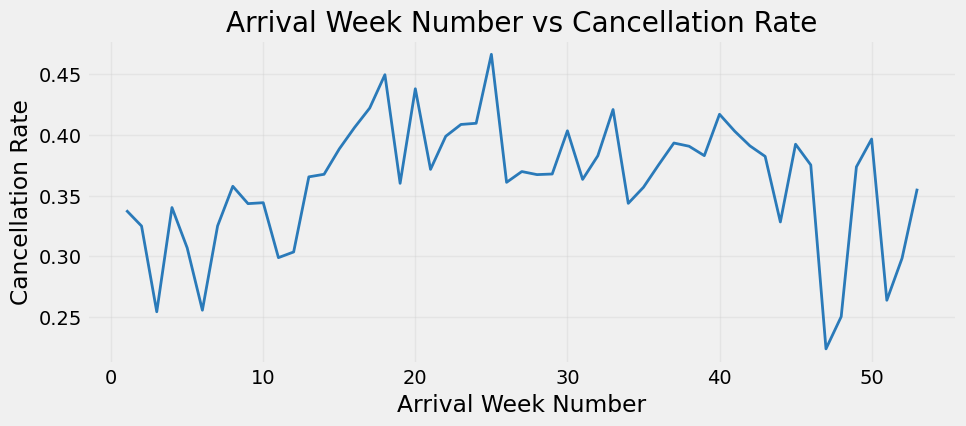

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df.groupby('arrival_date_week_number')['is_canceled'].mean(),
         color='#2A7AB9', linewidth=2)
plt.title('Arrival Week Number vs Cancellation Rate')
plt.xlabel('Arrival Week Number')
plt.ylabel('Cancellation Rate')
plt.grid(alpha=0.3)
plt.show()


**Analysis:**

The line chart shows how cancellation rates vary across different weeks of the year.
There are noticeable peaks and dips, indicating strong seasonal effects.
Higher cancellation rates often occur during popular travel weeks or holiday periods, possibly due to overbookings or last-minute plan changes.

**Business implication:**

Hotels should prepare for higher cancellation volatility in these weeks by adjusting room availability or applying stricter cancellation policies.

**8.2.3 lead_time vs Cancellation**

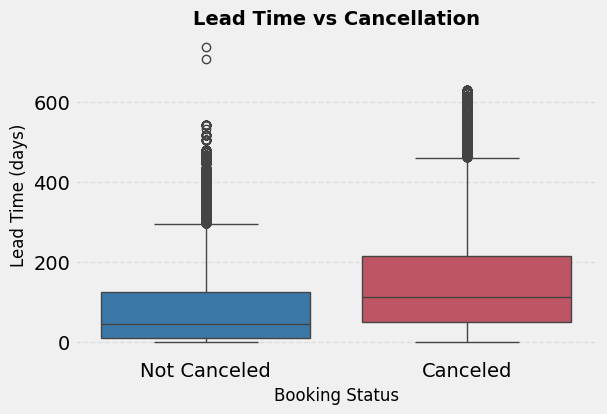

In [ ]:

leadtime_palette = {
    '0': '#2A7AB9',
    '1': '#CE4459'
}


plt.figure(figsize=(6,4))
sns.boxplot(
    x='is_canceled',
    y='lead_time',
    data=df,
    palette=leadtime_palette
)


plt.title('Lead Time vs Cancellation', fontsize=14, weight='bold')
plt.xlabel('Booking Status', fontsize=12)
plt.ylabel('Lead Time (days)', fontsize=12)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


**Analysis:**

The boxplot clearly shows that canceled bookings (red) have a much higher median lead time compared to non-canceled bookings (blue).
This indicates that guests who book far in advance are more likely to cancel, possibly because their plans change over time or they find better deals later.

Median lead time for canceled bookings ≈ 150–200 days

Median lead time for non-canceled bookings ≈ 50 days

Some extreme outliers (up to 600+ days) reflect long-term reservations that were later canceled.

**Business implication:**

Hotels can use this insight to:

Implement tiered cancellation policies — stricter rules for early bookings.

Send reminder or confirmation emails before arrival to reduce uncertainty.

Consider offering small non-refundable deposits to ensure commitment for long lead-time guests.

**8.2.4 month vs Cancellation**

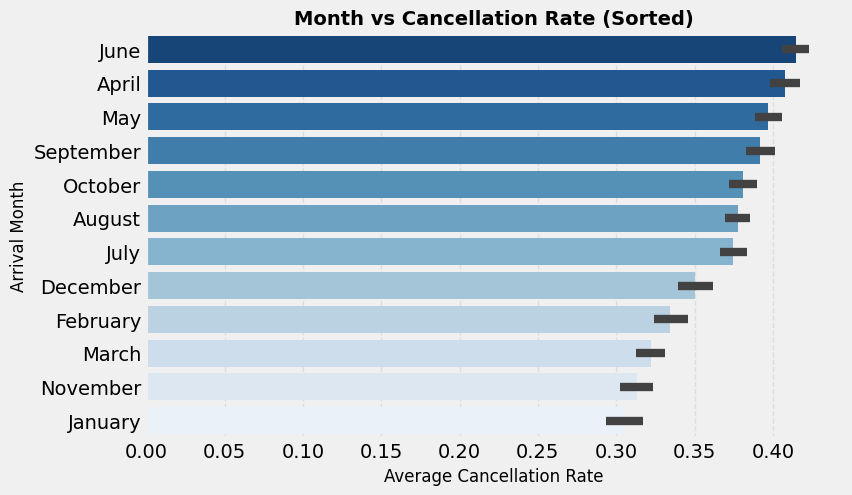

In [ ]:

month_order = (
    df.groupby('arrival_date_month')['is_canceled']
    .mean()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(8,5))
sns.barplot(
    y='arrival_date_month',
    x='is_canceled',
    data=df,
    order=month_order,
    palette='Blues_r'
)

plt.title('Month vs Cancellation Rate (Sorted)', fontsize=14, weight='bold')
plt.ylabel('Arrival Month', fontsize=12)
plt.xlabel('Average Cancellation Rate', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()



**Analysis:**

The chart clearly shows that cancellation rates vary across months, with noticeable seasonal patterns:

June, April, and May have the highest cancellation rates (around 0.40). These months correspond to spring and early summer, when leisure travel is common and travelers often make flexible plans.

September and October show medium cancellation rates, likely due to post-summer trips and short holidays.

Winter months (January, November, December) have the lowest cancellation rates, reflecting more stable travel behavior — such as business trips or fixed holiday travel.

**Business implications:**

During high-cancellation months, hotels can implement stricter deposit or cancellation policies and overbooking buffers.

In low-cancellation months, hotels may offer non-refundable discounts or loyalty incentives to maintain occupancy and reward commitment.

Understanding these seasonal patterns helps hotels optimize pricing and staffing to minimize the impact of cancellations.

**Main Predictors of Cancellation**

  The Random Forest model identifies deposit_type, arrival_date_week_number, and lead_time as the most influential predictors of hotel booking cancellations.

  Deposit Type stands out as the top driver — non-refundable deposits have the highest cancellation rates (approaching 100%), indicating that customers booking under rigid terms may later change plans.

  Lead Time and Arrival Week suggest that early and seasonal bookings tend to be riskier, especially around peak travel periods.

  In contrast, repeat guests, special requests, and higher ADRs correlate with greater commitment, reducing the chance of cancellation.

  This integrated analysis shows that cancellations are predictable and largely driven by deposit conditions, booking timing, and seasonality. By combining predictive modeling with behavioral insights, hotels can move from reactive management to proactive cancellation prevention, ultimately improving occupancy stability, revenue predictability, and customer satisfaction.
